In [ ]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
from datetime import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()


In [7]:
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [11]:
# Calculate the date 1 year ago from today
session.query(Measurement.date).order_by(Measurement.date.desc()).first()
from datetime import date
from dateutil.relativedelta import relativedelta

date(2017,8,23)+relativedelta(months=-12)


datetime.date(2016, 8, 23)

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
last_12_month_prcp = session.execute("""SELECT date, prcp FROM Measurement WHERE date BETWEEN '2016-08-23' and '2017-08-23'""").fetchall()
#   
last_12_month_prcp

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [13]:
session.query(Measurement.date, Measurement.prcp).all()

[('2010-01-01', 0.08),
 ('2010-01-02', 0.0),
 ('2010-01-03', 0.0),
 ('2010-01-04', 0.0),
 ('2010-01-06', None),
 ('2010-01-07', 0.06),
 ('2010-01-08', 0.0),
 ('2010-01-09', 0.0),
 ('2010-01-10', 0.0),
 ('2010-01-11', 0.01),
 ('2010-01-12', 0.0),
 ('2010-01-14', 0.0),
 ('2010-01-15', 0.0),
 ('2010-01-16', 0.0),
 ('2010-01-17', 0.0),
 ('2010-01-18', 0.0),
 ('2010-01-19', 0.0),
 ('2010-01-20', 0.0),
 ('2010-01-21', 0.0),
 ('2010-01-22', 0.0),
 ('2010-01-23', 0.0),
 ('2010-01-24', 0.01),
 ('2010-01-25', 0.0),
 ('2010-01-26', 0.04),
 ('2010-01-27', 0.12),
 ('2010-01-28', 0.0),
 ('2010-01-30', None),
 ('2010-01-31', 0.03),
 ('2010-02-01', 0.01),
 ('2010-02-03', None),
 ('2010-02-04', 0.01),
 ('2010-02-05', 0.0),
 ('2010-02-06', 0.0),
 ('2010-02-07', 0.0),
 ('2010-02-08', 0.0),
 ('2010-02-09', 0.0),
 ('2010-02-11', 0.0),
 ('2010-02-12', 0.02),
 ('2010-02-13', 0.01),
 ('2010-02-14', 0.0),
 ('2010-02-15', 0.0),
 ('2010-02-16', 0.0),
 ('2010-02-17', 0.0),
 ('2010-02-19', None),
 ('2010-02-20', 0

In [14]:
# Perform a query to retrieve the data and precipitation scores
last_12_month_prcp_df = pd.DataFrame(data = last_12_month_prcp, columns = ["date", "prcp"])
last_12_month_prcp_df.head()
last_12_month_prcp_df["date"] = pd.to_datetime(last_12_month_prcp_df.date)
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
last_12_month_prcp_df = last_12_month_prcp_df.set_index("date")
last_12_month_prcp_df.fillna(0)
last_12_month_prcp_df.head()


,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


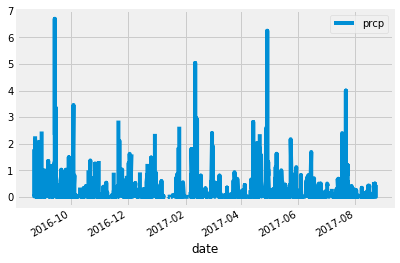

In [15]:
last_12_month_prcp_df.plot()




In [16]:
# Use Pandas Plotting with Matplotlib to plot the data


In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
last_12_month_prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [18]:
# How many stations are available in this dataset?
# Display the row's columns and data in dictionary format
first_row = session.query(Measurement).first()
first_row.__dict__
from sqlalchemy import distinct
from sqlalchemy.sql import label
# count distinct "name" values
unique_stations = session.query(func.distinct(Station.station)).count()
unique_stations
print("Total number of stations: {}".format(unique_stations))

Total number of stations: 9


In [19]:
# What are the most active stations?
# List the stations and the counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
# print(most_active_stations)
df_active_stations = pd.DataFrame(data=most_active_stations, columns=['Station', 'Count'])
df_active_stations.head()

,Station,Count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612


In [20]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
lowest_temp = session.query(func.min(Measurement.tobs)).\
    filter(Measurement.station == "USC00519281")
min_temp = session.scalar(lowest_temp)
print("Lowest temperature for Station USC00519281: {}".format(min_temp))

highest_temp = session.query(func.max(Measurement.tobs)).\
    filter(Measurement.station == "USC00519281")
max_temp = session.scalar(highest_temp)
print("Highest temperature for Station USC00519281: {}".format(max_temp))

average_temp = session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.station == "USC00519281")
avg_temp = session.scalar(average_temp)
print("Average temperature for Station USC00519281: {}".format(avg_temp))


Lowest temperature for Station USC00519281: 54.0
Highest temperature for Station USC00519281: 85.0
Average temperature for Station USC00519281: 71.66378066378067


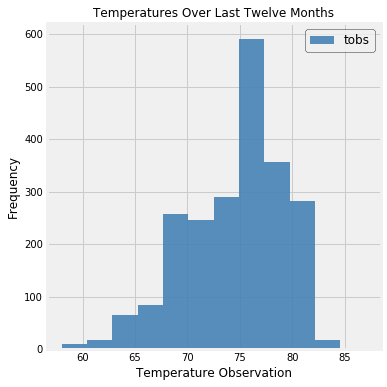

In [21]:
# Choose the station with the highest number of temperature observations.
highest_temp_obs = session.query(Measurement.station, func.count(Measurement.tobs)).\
    group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()
# print(highest_temp_obs)
df_highest_temp_obs = pd.DataFrame(data=highest_temp_obs, columns=['Station', 'Count'])
df_highest_temp_obs.head()
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_12_month_tobs = session.query(Measurement.date, Measurement.tobs).\
filter(Measurement.date >= '2016-08-24').filter(Measurement.date <= '2017-08-23').\
order_by(Measurement.date).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
last_12_month_tobs_df = pd.DataFrame(last_12_month_tobs)
last_12_month_tobs_df.head()
# Sort the dataframe by date
last_12_month_tobs_df.fillna(0)
last_12_month_tobs_df = last_12_month_tobs_df[["date","tobs"]]

last_12_month_tobs_df = last_12_month_tobs_df.set_index('date', drop=True)
last_12_month_tobs_df.head()

x_tobs = last_12_month_tobs_df['tobs']
num_bins = 12
# the histogram of the data

plt.figure(figsize=[5.8, 6])
temp_plot = plt.hist(x_tobs, num_bins, facecolor='steelblue', label='tobs', alpha=0.9)

plt.xlabel('Temperature Observation', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Temperatures Over Last Twelve Months', fontsize=12)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x_obs', labelsize=10)
legend = plt.legend(frameon=True, edgecolor='black', fontsize='large')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

In [22]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates

def calc_temps(start_date, end_date):
    start_date = dt.strptime(start_date,'%Y-%m-%d')
    end_date = dt.strptime(end_date,'%Y-%m-%d')    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
    
[(TMIN, TAVE, TMAX)] = calc_temps('2012-02-28', '2012-03-05')
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.4375, 74.0)]


In [23]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

print(calc_temps('2017-02-28', '2017-03-05'))
[(last_year_tmin, last_year_tave, last_year_tmax)] = calc_temps('2017-02-28', '2017-03-05')

[(64.0, 71.96551724137932, 78.0)]


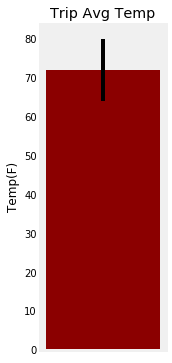

In [24]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
fig, ax = plt.subplots(figsize=(2,6))
ax.bar(1, last_year_tave, yerr=[(last_year_tmin-last_year_tave, last_year_tmax-last_year_tave)], color='darkred')
plt.xticks([])
ax.set_title('Trip Avg Temp')
ax.set_ylabel('Temp(F)')
plt.grid()
plt.show()

In [25]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
# vac_prcp = session.execute("""SELECT m.date, s.station, s.name, s.latitude, s.longitude, s.elevation FROM Station s RIGHT JOIN Measurement m ON s.station WHERE date BETWEEN '2017-02-28' and '2017-03-05'""").fetchall()
# vac_prcp
# # # m = session.query(Station).first()
# # # m.__dict__
# [print(x) for x in range vac_prcp]
def calc_prcp(start_date, end_date):
    start_date = dt.strptime(start_date,'%Y-%m-%d')
    end_date = dt.strptime(end_date,'%Y-%m-%d') 
    prcp_sum =  session.query(Measurement.station, func.sum(Measurement.prcp)).\
        filter(Measurement.date >= start_date).\
        filter(Measurement.date <= end_date).\
        group_by(Measurement.station).\
        order_by(func.sum(Measurement.prcp).desc()).all()
   
    return prcp_sum
# foo = vac_prcp.append([vac_prcp for x,y in calc_prcp])
# vac_prcp_df
print(calc_prcp('2017-02-28', '2017-03-05'))

    
calc_prcp_attach = calc_prcp('2017-02-28', '2017-03-05')

vac_prcp_df = pd.DataFrame(data = calc_prcp_attach, columns=['Station', 'Total Prep'])
for measure_stn in vac_prcp_df['Station']:
    prcp_name = session.query(Station.name).filter(Station.station == measure_stn)

vac_prcp_df['Name'] = 0
vac_prcp_df['Latitude'] = 0
vac_prcp_df['Longitude'] = 0
vac_prcp_df['Elevation'] = 0
print(prcp_name)
vac_prcp_df
#     vac_prcp_df['Name'] = session.query(Station.name)
#     vac_prcp_df['Latitude'] = session.query(Station.latitude)


[('USC00519281', 4.68), ('USC00513117', 4.29), ('USC00516128', 3.49), ('USC00517948', 2.98), ('USC00519397', 2.7399999999999998), ('USC00519523', 2.32), ('USC00514830', 1.12)]
SELECT station.name AS station_name 
FROM station 
WHERE station.station = ?


,Station,Total Prep,Name,Latitude,Longitude,Elevation
0,USC00519281,4.68,0,0,0,0
1,USC00513117,4.29,0,0,0,0
2,USC00516128,3.49,0,0,0,0
3,USC00517948,2.98,0,0,0,0
4,USC00519397,2.74,0,0,0,0
5,USC00519523,2.32,0,0,0,0
6,USC00514830,1.12,0,0,0,0


## Optional Challenge Assignment

In [26]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
   
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
   
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
[(m11, m21, m31)] = daily_normals('02-28')
[(m12, m22, m32)] = daily_normals('03-01')
[(m13, m23, m33)] = daily_normals('03-02')
[(m14, m24, m34)] = daily_normals('03-03')
[(m15, m25, m35)] = daily_normals('03-04')
[(m16, m26, m36)] = daily_normals('03-05')


# day1 = [m11, m12, m13, m14, m15, m16]
# day2 = [m21, m22, m23, m24, m25, m26]
# day3 = [m31, m32, m33, m34, m35, m36]

day1 = [m11, m21, m31]
day2 = [m12, m22, m32]
day3 = [m13, m23, m33]
day4 = [m14, m24, m34]
day5 = [m15, m25, m35]
day6 = [m16, m26, m36]


date_range = ['02-28', '03-01', '03-02', '03-03', '03-04', '03-05']

daily_log = pd.DataFrame(data = [day1, day2, day3, day4, day5, day6], index = date_range, columns = ['tmin', 'tavg', 'tmax'])
daily_log


,tmin,tavg,tmax
02-28,65.0,70.655172,80.0
03-01,64.0,70.032787,76.0
03-02,61.0,70.366667,78.0
03-03,60.0,70.068966,78.0
03-04,57.0,69.272727,77.0
03-05,60.0,67.890909,76.0


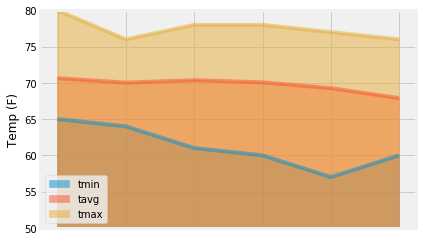

In [27]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
# Plot the daily normals as an area plot with `stacked=False`
# make the area plot
daily_log.plot.area(stacked = False)
plt.ylim(50, 80)
plt.ylabel("Temp (F)")
plt.show()
